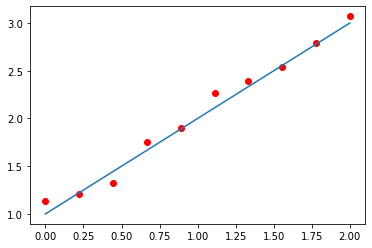

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# generating data by first taking equispaced 
# points on the line and then shifting them with a 
# random noise epsilon

beta = np.ones((2,1))
x = np.linspace(0,2,10)

epsilon = np.random.normal(0,0.1, len(x))

t = beta[0] + beta[1]*x
tnoisy = t + epsilon


plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()


In [173]:
print(np.shape(tnoisy))

(10,)


In [174]:
# Applying gradient descent iterations in order to learn the 
# best line from the training data (in red)

maxIter = 100
learning_rate = .1

# starting with a random initial guess on the values of beta

beta = np.random.normal(0,1, np.shape(beta))

# defining xtilde
    
xtilde = np.vstack((np.ones((1,len(x))), x)).T

currentIter = 0

N = np.shape(xtilde)[0]

loss = np.zeros((maxIter,))

while currentIter < maxIter:
    
    
    # gradient =  sum_i (t_i - beta^T xtilde_i) * (-xtilde_i)
    deviation = (tnoisy.reshape(-1,1)- np.matmul(xtilde, beta.reshape(-1,1)))
    grad = -(1/N)*np.matmul(deviation.reshape(-1,1).T, xtilde)
    beta = beta - learning_rate * grad.reshape(-1,1)
    
    loss[currentIter] = (1/N)*np.sum(deviation**2)
    currentIter +=1



In [175]:
print(np.shape(xtilde))

(10, 2)


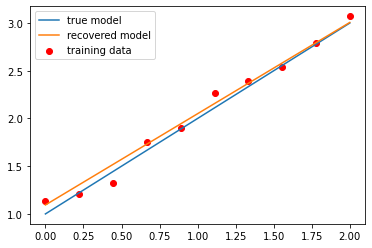

In [176]:
# in order to display the result of our model, we generate a 
# validation set (distinct from the training set)

# ex generate test set from equispaced points on the limits 
# of my space

xtest = np.linspace(0,2, 100)
xtilde_test = np.vstack((np.ones((1,len(xtest))), xtest)).T

ttest = np.matmul(xtilde_test, beta)

plt.plot(x, t)
plt.plot(xtest, ttest)
plt.scatter(x, tnoisy, c='r')
plt.legend(['true model', 'recovered model', 'training data'])
plt.show()


In [79]:
loss[0]

1.3687314312375252

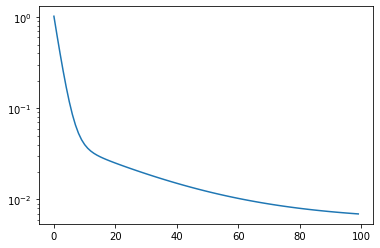

In [177]:
# In order to monitor the learning of our algorithm, we can plot 
# the evolution of the loss throughout the iterations

plt.semilogy(loss)
plt.show()




In [112]:
np.arange(N+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [183]:
# Implementing stochastic gradient descent. 


# Applying gradient descent iterations in order to learn the 
# best line from the training data (in red)

maxNumEpochs = 100
learning_rate = .01

# starting with a random initial guess on the values of beta

beta = np.random.normal(0,1, np.shape(beta))

# defining xtilde
    


currentEpoch = 0

N = np.shape(x)[0]

loss_SGD = np.zeros((maxNumEpochs,))

while currentEpoch < maxNumEpochs:
    
    shuffle_indices = np.arange(N)
    np.random.shuffle(shuffle_indices)
    x = x[shuffle_indices]
    tnoisy = tnoisy[shuffle_indices]
    #print(np.shape(tnoisy))
    xtilde = np.vstack((np.ones((1,len(x))), x)).T
    
    
    for i in range(len(x)):
        
        # gradient =  sum_i (t_i - beta^T xtilde_i) * (-xtilde_i)
        deviation = 2*(tnoisy[i].reshape(-1,1)- np.matmul(xtilde[i,:], beta.reshape(-1,1)))
        
        grad = -deviation*xtilde[i,:]
        
        beta = beta - learning_rate * grad.reshape(-1,1)
    
    # computing the value of the loss after each epoch
    
    tmp = np.sum((tnoisy.reshape(-1,1) - np.matmul(xtilde, beta.reshape(-1,1)))**2)
    loss_SGD[currentEpoch] = (1/N)*tmp
    currentEpoch +=1



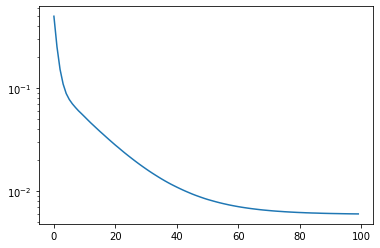

In [186]:
# In order to monitor the learning of our algorithm, we can plot 
# the evolution of the loss throughout the iterations

plt.semilogy(loss_SGD)
plt.show()


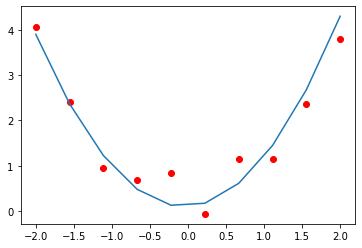

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# generating data by first taking equispaced 
# points on the line and then shifting them with a 
# random noise epsilon

x = np.linspace(-2,2,10)

epsilon = np.random.normal(0,0.4, len(x))

beta = np.asarray([.1, .1, 1])

t = beta[0] + beta[1]*x + beta[2]*x**2
tnoisy = t + epsilon


plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()


In [220]:
# In order to learn a linear model on non linear data, 
# what we can do is to consider additional polynomial features

# recall that before we learned the model on xtilde
# we will now learn a linear model on an xtilde given by adding 
# a column containing x_i**2


xtilde1 = np.hstack((np.ones((np.shape(x)[0], 1)), x.reshape(-1,1)))
xtilde2 = np.hstack((xtilde1, (x.reshape(-1,1))**2))

# we can now apply gradient descent on xtilde2 to learn a 
# regression vector beta = [beta_0, beta_1, beta_2]

maxIter = 2000
learning_rate = .01

# starting with a random initial guess on the values of beta

beta = np.random.normal(0,1, (3,1))

# defining xtilde
    

currentIter = 0

N = np.shape(xtilde2)[0]

loss = np.zeros((maxIter,))

while currentIter < maxIter:
    
    
    # gradient =  sum_i (t_i - beta^T xtilde_i) * (-xtilde_i)
    deviation = (tnoisy.reshape(-1,1)- np.matmul(xtilde2, beta.reshape(-1,1)))
    grad = -(1/N)*np.matmul(deviation.reshape(-1,1).T, xtilde2)
    beta = beta - learning_rate * grad.reshape(-1,1)
    
    loss[currentIter] = (1/N)*np.sum(deviation**2)
    currentIter +=1



In [221]:
print(beta)

[[ 0.29683861]
 [-0.01580795]
 [ 0.88073676]]


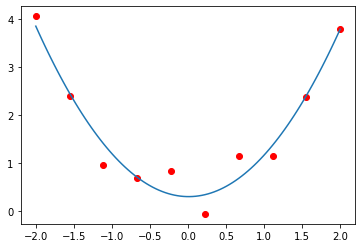

In [222]:
# to display the accuracy of the learned model we can then generate points between 
# -2 and 2 on which we apply the model and then plot the result

xprediction = np.linspace(-2,2,100)

# before applying our linear model, we need to generate 
# the degree 2 features
Xtildeprediction = np.hstack((np.ones((np.shape(xprediction)[0], 1)), xprediction.reshape(-1,1)))
Xtildeprediction = np.hstack((Xtildeprediction, (xprediction.reshape(-1,1))**2))

prediction = np.matmul(Xtildeprediction, beta.reshape(-1,1))

plt.scatter(x, tnoisy, c='r')
plt.plot(xprediction, prediction)
plt.show()

[ 0.         -0.01580795  0.88079708]
0.2966783706641498


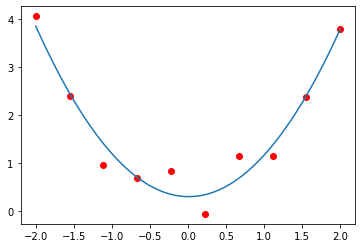

In [231]:
# Equivalent result from ScikitLearn 

# Same result can be obtained with the scikit learn implementation

from sklearn.linear_model import LinearRegression


my_regression = LinearRegression()

# as before for a non linearly generated dataset, we first 
# need to generate additional features. This can be done through 
# PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
myPolyTransform = PolynomialFeatures(2)

# Applying the polynomial feature implementation to the original 
# feature vector x 

xfeatures = myPolyTransform.fit_transform(x.reshape(-1,1)) 

my_regression.fit(xfeatures, tnoisy)

print(my_regression.coef_)
print(my_regression.intercept_)

# to display the prediction, we first generate the polynomial features 
# from xprediction (this can be achieved through ScikitLearn 
# PolynomialFeatures), 
# then we can apply our model to the resuting matrix 

xtildePrediction = myPolyTransform.fit_transform(xprediction.reshape(-1,1)) 

# to get the prediction, we can then simply use the 'predict' function of the 
# linear regression model 

prediction = my_regression.predict(xtildePrediction)

plt.scatter(x, tnoisy, c='r')
plt.plot(xprediction, prediction)
plt.show()

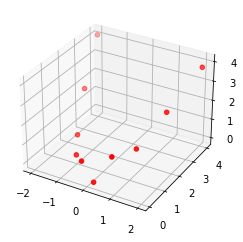

In [235]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, x**2, tnoisy, c='r')
plt.show()

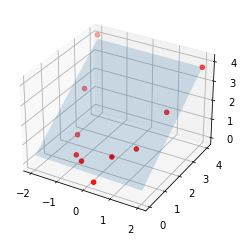

In [240]:
x1 = np.linspace(np.min(x), np.max(x), 100)
x2 = np.linspace(np.min(x**2), np.max(x**2), 100)

xx1, xx2 = np.meshgrid(x1, x2)


Xtilde = np.hstack((xx1.reshape(-1,1), xx2.reshape(-1,1)))

Xtilde = np.hstack(((np.ones((np.shape(Xtilde)[0], 1))), Xtilde))

prediction = np.matmul(Xtilde, beta)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, x**2, tnoisy, c='r')
ax.plot_surface(xx1, xx2, np.reshape(prediction,np.shape(xx1)),alpha=.2)
plt.show()

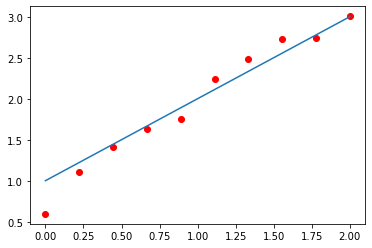

In [242]:
import numpy as np
import matplotlib.pyplot as plt

# generating data by first taking equispaced 
# points on the line and then shifting them with a 
# random noise epsilon

beta = np.ones((2,1))
x = np.linspace(0,2,10)

epsilon = np.random.normal(0,0.2, len(x))

t = beta[0] + beta[1]*x
tnoisy = t + epsilon


plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()


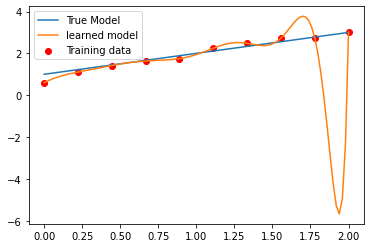

In [255]:

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
import numpy as np

poly = PolynomialFeatures(15)

Xtilde = poly.fit_transform(x.reshape(-1,1))

from sklearn.linear_model import LinearRegression

myRegression = LinearRegression()

myRegression.fit(Xtilde, tnoisy)

xprediction = np.linspace(0, 2, 100)

Xtildeprediction = poly.fit_transform(xprediction.reshape(-1,1))

prediction = myRegression.predict(Xtildeprediction)


plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(xprediction, prediction)
plt.legend(['True Model', 'learned model', 'Training data'])
plt.show()

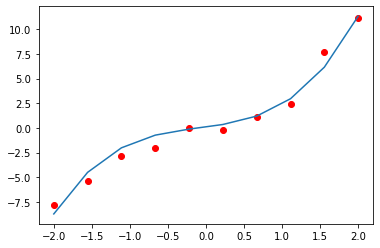

In [289]:
import numpy as np
import matplotlib.pyplot as plt

# generating data by first taking equispaced 
# points on the line and then shifting them with a 
# random noise epsilon

x = np.linspace(-2,2,10)

epsilon = np.random.normal(0,1, len(x))

beta = np.asarray([.1, 1, .3, 1])

t = beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3
tnoisy2 = t + epsilon


plt.scatter(x, tnoisy2, c='r')
plt.plot(x, t)
plt.show()

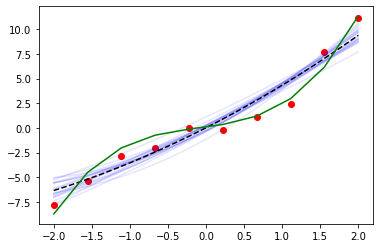

In [295]:

numXP = 20

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


poly = PolynomialFeatures(2)

Xtilde = poly.fit_transform(x.reshape(-1,1))

myRegression = LinearRegression()

xprediction = np.linspace(-2,2,100)

XTildeprediction = poly.fit_transform(xprediction.reshape(-1,1))

plt.scatter(x, tnoisy2, c='r')



predictionSet = np.zeros((len(xprediction), numXP))

for xp in np.arange(numXP):
    
    epsilon = np.random.normal(0,1, len(x))
    tnoisy = t + epsilon
    myRegression.fit(Xtilde, tnoisy)
    
    prediction = myRegression.predict(XTildeprediction)
    
    predictionSet[:,xp] = prediction
    
    plt.plot(xprediction, prediction, c='b', alpha=.1)
    
    
meanModel = np.mean(predictionSet, axis=1)
plt.plot(xprediction, meanModel, 'k--')
plt.plot(x, t, c = 'g')
plt.show()

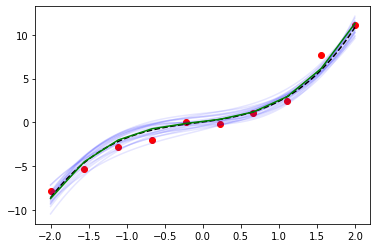

In [293]:

numXP = 20

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


poly = PolynomialFeatures(3)

Xtilde = poly.fit_transform(x.reshape(-1,1))

myRegression = LinearRegression()

xprediction = np.linspace(-2,2,100)

XTildeprediction = poly.fit_transform(xprediction.reshape(-1,1))



plt.scatter(x, tnoisy2, c='r')

predictionSet = np.zeros((len(xprediction), numXP))

for xp in np.arange(numXP):
    
    epsilon = np.random.normal(0,1, len(x))
    tnoisy = t + epsilon
    myRegression.fit(Xtilde, tnoisy)
    
    prediction = myRegression.predict(XTildeprediction)
    
    predictionSet[:,xp] = prediction
    
    plt.plot(xprediction, prediction, c='b', alpha=.1)
    
    
meanModel = np.mean(predictionSet, axis=1)
plt.plot(xprediction, meanModel, 'k--')
plt.plot(x, t, c = 'g')
plt.show()

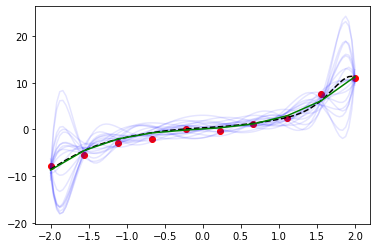

In [297]:

numXP = 20

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


poly = PolynomialFeatures(10)

Xtilde = poly.fit_transform(x.reshape(-1,1))

myRegression = LinearRegression()

xprediction = np.linspace(-2,2,100)

XTildeprediction = poly.fit_transform(xprediction.reshape(-1,1))



plt.scatter(x, tnoisy2, c='r')

predictionSet = np.zeros((len(xprediction), numXP))

for xp in np.arange(numXP):
    
    epsilon = np.random.normal(0,1, len(x))
    tnoisy = t + epsilon
    myRegression.fit(Xtilde, tnoisy)
    
    prediction = myRegression.predict(XTildeprediction)
    
    predictionSet[:,xp] = prediction
    
    plt.plot(xprediction, prediction, c='b', alpha=.1)
    
    
meanModel = np.mean(predictionSet, axis=1)
plt.plot(xprediction, meanModel, 'k--')
plt.plot(x, t, c = 'g')
plt.show()